# Data Mining Practicals

<b>Q1. Create a file “people.txt” with the following data:<b/>

In [12]:
!(data.jpg)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# i)
df=pd.read_csv('people.txt')
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [52]:
df1 = np.array(df)
for i in df1:
    print(i)

[21 'adult' 6.0 'single' -1]
[2 'child' 3.0 'married' 0]
[18 'adult' 5.7 'married' 20]
[221 'elderly' 5.0 'widowed' 2]
[34 'child' -7.0 'married' 3]


<b>ii) Create a ruleset E that contain rules to check for the following conditions:
1. The age should be in the range 0-150.
2. The age should be greater than yearsmarried.
3. The status should be married or single or widowed.
4. If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup 
should be adult, if age is more than 65 the agegroup should be elderly.<b/>

In [77]:
# ii)
def ruleset_E(data):
    violations = []
    for record in data:
        Age, agegroup, height, status, yearsmarried = record
        if not (0 <= Age <= 150):
            violations.append(f"Age {Age} is not in the range 0-150.")
        if Age <= yearsmarried:
            violations.append(f"Age {Age} is not greater than years married ({yearsmarried}).")
        if status not in ['single', 'married', 'widowed']:
            violations.append(f"Status {status} is not valid.")
        if Age < 18 and agegroup != 'child':
            violations.append(f"Age {Age} should have agegroup 'child'.")
        elif 18 <= Age <= 65 and agegroup != 'adult':
            violations.append(f"Age {Age} should have agegroup 'adult'.")
        elif Age > 65 and agegroup != 'elderly':
            violations.append(f"Age {Age} should have agegroup 'elderly'.")
    return violations


<b>iii) Check whether ruleset E is violated by the data in the file people.txt.<b/>

In [78]:
violations=ruleset_E(df1)
violations

['Age 18 is not greater than years married (20).',
 'Age 221 is not in the range 0-150.',
 "Age 34 should have agegroup 'adult'."]

<b>iv) Summarize the results obtained in part (iii)<b/>



In [79]:
if violations:
    print("Ruleset E is violated by the data in people.txt:")
    for violation in violations:
        print(violation)
else:
    print("No violations found in the data.")

Ruleset E is violated by the data in people.txt:
Age 18 is not greater than years married (20).
Age 221 is not in the range 0-150.
Age 34 should have agegroup 'adult'.


<b>v) Visualize the results obtained in part (iii)<b/>


Ruleset E is violated by the data in people.txt:
Rule 'Age range': 1 violation(s)
Rule 'Age greater than years married': 1 violation(s)
Rule 'Valid age group': 1 violation(s)


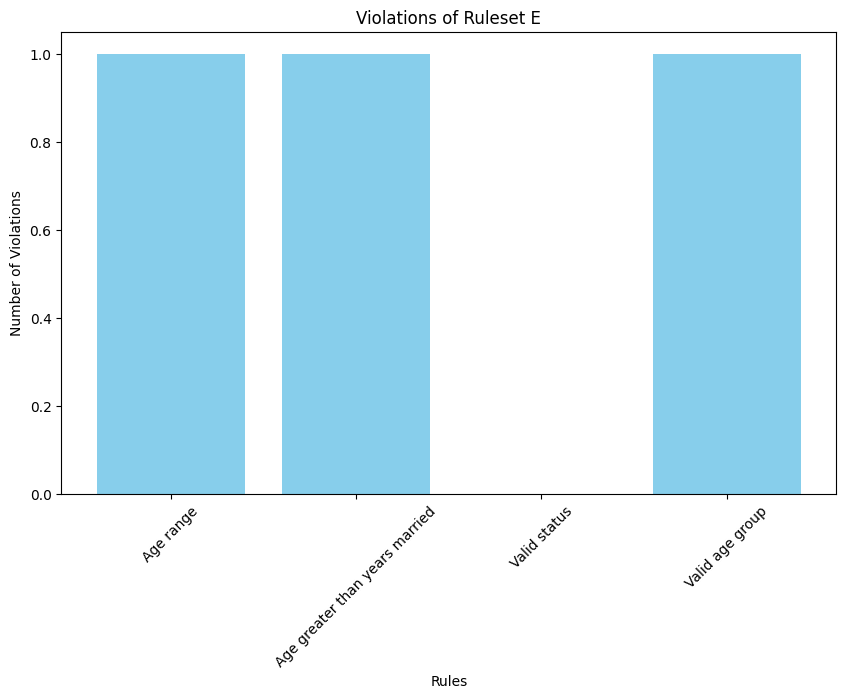

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from file using read_csv method
def read_data_csv(file_path):
    df = pd.read_csv(file_path, delimiter=' ')
    return df.values.tolist()

# Define ruleset E
def ruleset_E(data):
    violations_count = {'Age range': 0, 'Age greater than years married': 0, 'Valid status': 0, 'Valid age group': 0}
    for record in data:
        age, agegroup, height, status, yearsmarried = record
        if not (0 <= age <= 150):
            violations_count['Age range'] += 1
        if age <= yearsmarried:
            violations_count['Age greater than years married'] += 1
        if status not in ['single', 'married', 'widowed']:
            violations_count['Valid status'] += 1
        if (age < 18 and agegroup != 'child') or (18 <= age <= 65 and agegroup != 'adult') or (age > 65 and agegroup != 'elderly'):
            violations_count['Valid age group'] += 1
    return violations_count

# Read data from file
file_path = "people.txt"
data = read_data_csv(file_path)

# Apply ruleset E
violations_count = ruleset_E(df1)

# Summarize results
if sum(violations_count.values()) > 0:
    print("Ruleset E is violated by the data in people.txt:")
    for rule, count in violations_count.items():
        if count > 0:
            print(f"Rule '{rule}': {count} violation(s)")
else:
    print("No violations found in the data.")

# Visualize results
rules = list(violations_count.keys())
counts = list(violations_count.values())

plt.figure(figsize=(10, 6))
plt.bar(rules, counts, color='skyblue')
plt.xlabel('Rules')
plt.ylabel('Number of Violations')
plt.title('Violations of Ruleset E')
plt.xticks(rotation=45)
plt.show()


<b>Q2. Perform the following preprocessing tasks on the dirty_iris dataset<b/>

In [5]:
df=pd.read_csv("dirty_iris.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


<b>i) Calculate the number and percentage of observations that are complete.<b/>


In [6]:
num_complete = len(df.dropna())

pct_complete = num_complete / len(df) * 100

print("Number of complete observations: ", num_complete)
print("Percentage of complete observations: ", pct_complete)

Number of complete observations:  96
Percentage of complete observations:  64.0


<b>ii) Replace all the special values in data with NA.<b/>


In [7]:
numeric = df._get_numeric_data()
numeric[numeric < 0] = np.nan
numeric[numeric == np.inf] = np.nan
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


<b>iii) Define these rules in a separate text file and read them.<b/>

In [9]:
import rules
results = pd.DataFrame()
new_df = rules.rule1(df)
violations = len(df) - len(new_df)
nonViolations = len(new_df)
results['Rule 1'] = pd.Series({'Violations': violations, 'Non-Violations': nonViolations})

In [10]:
new_df = rules.rule2(df)
violations = len(df) - len(new_df)
nonViolations = len(new_df)
results['Rule 2'] = pd.Series({'Violations': violations, 'Non-Violations': nonViolations})

In [11]:
new_df = rules.rule3(df)
violations = len(df) - len(new_df)
nonViolations = len(new_df)
results['Rule 3'] = pd.Series({'Violations': violations, 'Non-Violations': nonViolations})

In [12]:
new_df = rules.rule4(df)
violations = len(df) - len(new_df)
nonViolations = len(new_df)
results['Rule 4'] = pd.Series({'Violations': violations, 'Non-Violations': nonViolations})

In [13]:
new_df = rules.rule5(df)
violations = len(df) - len(new_df)
nonViolations = len(new_df)
results['Rule 5'] = pd.Series({'Violations': violations, 'Non-Violations': nonViolations})

In [14]:
results

,Rule 1,Rule 2,Rule 3,Rule 4,Rule 5
Violations,0,58,34,12,30
Non-Violations,150,92,116,138,120


<b>iv)Determine how often each rule is broken (violatedEdits). Also summarize and plot the
result<b/>


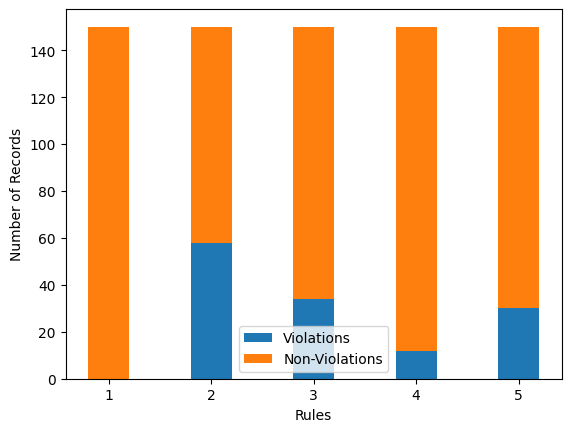

In [15]:
import matplotlib.pyplot as plt
p1 = plt.bar(np.arange(1, results.shape[1] + 1), results.loc['Violations'].values, 0.4)
p2 = plt.bar(np.arange(1, results.shape[1] + 1), results.loc['Non-Violations'].values, 0.4, bottom=results.loc['Violations'].values)
plt.legend((p1[0], p2[0]), ('Violations', 'Non-Violations'))
plt.ylabel('Number of Records')
plt.xlabel('Rules')
plt.show()

<b>v) Find outliers in sepal length using boxplot and boxplot.stats<b/>

<Axes: title={'center': 'Sepal.Length'}, xlabel='Species'>

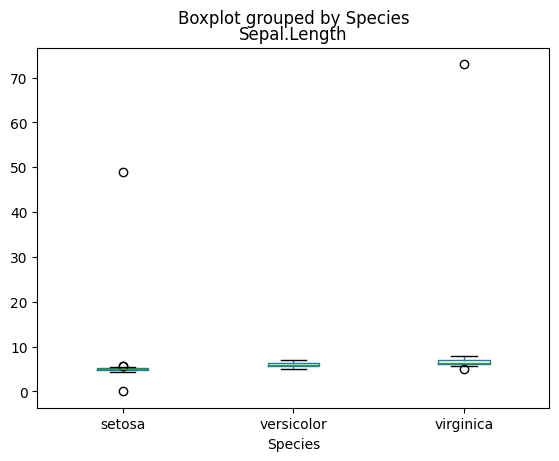

In [16]:
df.boxplot(by='Species', column=['Sepal.Length'], grid=False)

<Axes: >

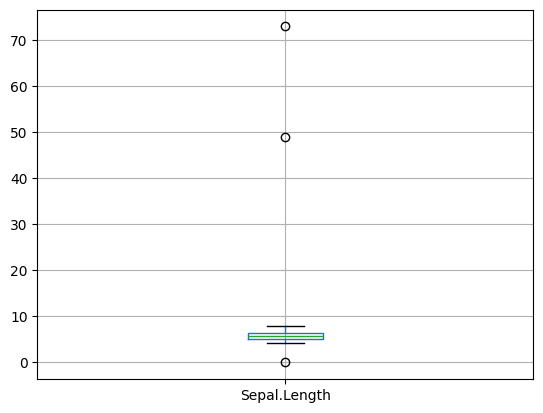

In [17]:
df[["Sepal.Length"]].boxplot()

<b>Q3. Load the data from wine dataset. Check whether all attributes are standardized or not (mean 
is 0 and standard deviation is 1). If not, standardize the attributes. Do the same with Iris dataset.<b/>

In [18]:
from sklearn import preprocessing
file=pd.read_csv('wine.csv')
file

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [23]:
# Question 3:-

import numpy as np
import pandas as pd

df=pd.read_csv('wine.csv')
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [24]:
df.std()

Wine                      0.775035
Alcohol                   0.811827
Malic.acid                1.117146
Ash                       0.274344
Acl                       3.339564
Mg                       14.282484
Phenols                   0.625851
Flavanoids                0.998859
Nonflavanoid.phenols      0.124453
Proanth                   0.572359
Color.int                 2.318286
Hue                       0.228572
OD                        0.709990
Proline                 314.907474
dtype: float64

In [25]:
df.mean()

Wine                      1.938202
Alcohol                  13.000618
Malic.acid                2.336348
Ash                       2.366517
Acl                      19.494944
Mg                       99.741573
Phenols                   2.295112
Flavanoids                2.029270
Nonflavanoid.phenols      0.361854
Proanth                   1.590899
Color.int                 5.058090
Hue                       0.957449
OD                        2.611685
Proline                 746.893258
dtype: float64

In [26]:
df1 = (df-df.mean())/df.std()
df1

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,-1.210529,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,-1.210529,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,-1.210529,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,-1.210529,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,-1.210529,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.370000,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890
174,1.370000,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866
175,1.370000,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786
176,1.370000,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664


In [27]:
df1.mean()

Wine                    0.000000e+00
Alcohol                -9.181170e-16
Malic.acid              0.000000e+00
Ash                    -8.070947e-16
Acl                    -7.983626e-17
Mg                     -1.995907e-17
Phenols                 3.991813e-17
Flavanoids             -3.592632e-16
Nonflavanoid.phenols    3.592632e-16
Proanth                -1.596725e-16
Color.int               1.995907e-17
Hue                     1.995907e-16
OD                      3.193450e-16
Proline                -7.983626e-17
dtype: float64

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
Y = iris.target

iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
iris_df.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [31]:
iris_df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [32]:
df2 = (iris_df-iris_df.mean())/iris_df.std()
df2

df2.mean()

sepal length (cm)   -1.415442e-15
sepal width (cm)    -1.652752e-15
petal length (cm)   -1.442550e-15
petal width (cm)    -5.543714e-16
dtype: float64

<b>Q4. Run Apriori algorithm to find frequent itemsets and association rules<b/>


In [34]:
market_basket = pd.read_csv('Market_Basket_Optimisation.csv')
market_basket

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
clean_data =[]

for i in range(len(market_basket)):
    clean_data.append([x for x in list(map(str,market_basket.iloc[i].tolist())) if x != 'nan'])
length = len(clean_data)
print(length) 

7500


In [36]:
from efficient_apriori import apriori
itemsets, rules = apriori(clean_data, min_support=0.05, min_confidence=0.075, verbosity=1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 120 candidate itemsets of length 1.
  Found 25 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 300 candidate itemsets of length 2.
  Found 3 large itemsets of length 2.
 Counting itemsets of length 3.
  Found 0 candidate itemsets of length 3.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
Rule generation terminated.



In [37]:
itemsets

{1: {('burgers',): 654,
  ('eggs',): 1348,
  ('turkey',): 469,
  ('mineral water',): 1787,
  ('milk',): 972,
  ('whole wheat rice',): 439,
  ('green tea',): 990,
  ('low fat yogurt',): 573,
  ('french fries',): 1282,
  ('soup',): 379,
  ('frozen vegetables',): 715,
  ('spaghetti',): 1306,
  ('cookies',): 603,
  ('cooking oil',): 383,
  ('shrimp',): 535,
  ('chocolate',): 1229,
  ('chicken',): 450,
  ('tomatoes',): 513,
  ('pancakes',): 713,
  ('grated cheese',): 393,
  ('ground beef',): 737,
  ('frozen smoothie',): 474,
  ('escalope',): 595,
  ('cake',): 608,
  ('olive oil',): 493},
 2: {('chocolate', 'mineral water'): 395,
  ('eggs', 'mineral water'): 382,
  ('mineral water', 'spaghetti'): 448}}

In [38]:
for item in sorted(rules, key=lambda item: (item.lift,item.conviction), reverse=True):
    print(item)

{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.349, conv: 1.123)
{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.349, conv: 1.073)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)


In [39]:
itemsets2, rules2 = apriori(clean_data, min_support=0.06, min_confidence=0.06, verbosity=1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 120 candidate itemsets of length 1.
  Found 21 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 210 candidate itemsets of length 2.
Itemset generation terminated.

Generating rules from itemsets.
Rule generation terminated.



In [40]:
itemsets2

{1: {('burgers',): 654,
  ('eggs',): 1348,
  ('turkey',): 469,
  ('mineral water',): 1787,
  ('milk',): 972,
  ('green tea',): 990,
  ('low fat yogurt',): 573,
  ('french fries',): 1282,
  ('frozen vegetables',): 715,
  ('spaghetti',): 1306,
  ('cookies',): 603,
  ('shrimp',): 535,
  ('chocolate',): 1229,
  ('chicken',): 450,
  ('tomatoes',): 513,
  ('pancakes',): 713,
  ('ground beef',): 737,
  ('frozen smoothie',): 474,
  ('escalope',): 595,
  ('cake',): 608,
  ('olive oil',): 493}}

In [41]:
for item in sorted(rules, key=lambda item: (item.lift,item.conviction), reverse=True):
        print(item)

{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.349, conv: 1.123)
{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.349, conv: 1.073)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)


<b>Q5. Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers. 
Divide the data set into training and test set. Compare the accuracy of the different classifiers 
under the following situations:<b/>

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split , cross_val_score,KFold,StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [44]:
iris = load_iris()
X = iris.data
y = iris.target 

# Spliting the data into Training set = 75% & Test set = 25%
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=0)

# Splitting the data into Training set = 66.6% (2/3rd of total) & Test set =33.3%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.33, random_state=0)

In [46]:
# initialize the models
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=3)

<b>5.1 a) Training set = 75% Test set = 25% b) Training set = 66.6% (2/3rd of total), Test set = 
33.3<b/>%

In [47]:
gnb.fit(X_train1, y_train1)
y_pred1 = gnb.predict(X_test1)
print("Naive Bayes accuracy for 75% training set: ", accuracy_score(y_test1, y_pred1))

knn.fit(X_train1, y_train1)
y_pred2 = knn.predict(X_test1)
print("KNN accuracy for 75% training set: ", accuracy_score(y_test1, y_pred2))

dt.fit(X_train1, y_train1)
y_pred3 = dt.predict(X_test1)
print("Decision Tree accuracy for 75% training set: ", accuracy_score(y_test1, y_pred3))

Naive Bayes accuracy for 75% training set:  1.0
KNN accuracy for 75% training set:  0.9736842105263158
Decision Tree accuracy for 75% training set:  0.9736842105263158


In [48]:
# 5.1 b) Training set = 66.6% (2/3rd of total), Test set =33.3%
gnb.fit(X_train2, y_train2)
y_pred4 = gnb.predict(X_test2)
print("Naive Bayes accuracy for 66.6% training set: ", accuracy_score(y_test2, y_pred4))

knn.fit(X_train2, y_train2)
y_pred5 = knn.predict(X_test2)
print("KNN accuracy for 66.6% training set: ", accuracy_score(y_test2, y_pred5))

dt.fit(X_train2, y_train2)
y_pred6 = dt.predict(X_test2)
print("Decision Tree accuracy for 66.6% training set: ", accuracy_score(y_test2, y_pred6))

Naive Bayes accuracy for 66.6% training set:  0.96
KNN accuracy for 66.6% training set:  0.98
Decision Tree accuracy for 66.6% training set:  0.94


 <b>5.2  Training set is chosen by i) hold out method ii) Random subsampling iii) Cross-Validation. Compare the accuracy of the classifiers obtained.<b/>

In [49]:
# hold out method
X_train3 , X_test3 , y_train3 , y_test3 = train_test_split(X, y, test_size=0.20, random_state=42)

gnb.fit(X_train3, y_train3)
y_pred7 = gnb.predict(X_test3)
print("Naive Bayes accuracy for hold out method: ", accuracy_score(y_test3, y_pred7))

knn.fit(X_train3, y_train3)
y_pred8 = knn.predict(X_test3)
print("KNN accuracy for hold out method: ", accuracy_score(y_test3, y_pred8))

dt.fit(X_train3, y_train3)
y_pred9 = dt.predict(X_test3)
print("Decision Tree accuracy for hold out method: ", accuracy_score(y_test3, y_pred9))

Naive Bayes accuracy for hold out method:  1.0
KNN accuracy for hold out method:  1.0
Decision Tree accuracy for hold out method:  1.0


In [50]:
# Random subsampling method
sum_gnb = 0
sum_knn = 0
sum_dt = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    sum_gnb += accuracy_score(y_test, y_pred)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    sum_knn += accuracy_score(y_test, y_pred)
    
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    sum_dt += accuracy_score(y_test, y_pred)

print("Naive Bayes accuracy for random subsampling method: ", sum_gnb/10)
print("KNN accuracy for random subsampling method: ", sum_knn/10)
print("Decision Tree accuracy for random subsampling method: ", sum_dt/10)

Naive Bayes accuracy for random subsampling method:  0.9473684210526315
KNN accuracy for random subsampling method:  0.9631578947368421
Decision Tree accuracy for random subsampling method:  0.9473684210526315


In [51]:
# cross-validation
gnb_scores = cross_val_score(gnb, X, y, cv=10)
print("Naive Bayes accuracy for cross-validation: ", gnb_scores.mean())

knn_scores = cross_val_score(knn, X, y, cv=10)
print("KNN accuracy for cross-validation: ", knn_scores.mean())

dt_scores = cross_val_score(dt, X, y, cv=10)
print("Decision Tree accuracy for cross-validation: ", dt_scores.mean())

Naive Bayes accuracy for cross-validation:  0.9533333333333334
KNN accuracy for cross-validation:  0.9666666666666668
Decision Tree accuracy for cross-validation:  0.96


<b>5.3 Data is scaled to standard format.<b/>

In [52]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

x_train4 , x_test4 , y_train4 , y_test4 = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

gnb.fit(x_train4, y_train4)
y_pred10 = gnb.predict(x_test4)
print("Naive Bayes accuracy for scaled data: ", accuracy_score(y_test4, y_pred10))

knn.fit(x_train4, y_train4)
y_pred11 = knn.predict(x_test4)
print("KNN accuracy for scaled data: ", accuracy_score(y_test4, y_pred11))

dt.fit(x_train4, y_train4)
y_pred12 = dt.predict(x_test4)
print("Decision Tree accuracy for scaled data: ", accuracy_score(y_test4, y_pred12))

Naive Bayes accuracy for scaled data:  1.0
KNN accuracy for scaled data:  1.0
Decision Tree accuracy for scaled data:  1.0


### Q6. Use Simple Kmeans, DBScan, Hierachical clustering algorithms for clustering. Compare the 
### performance of clusters by changing the parameters involved in the algorithms.

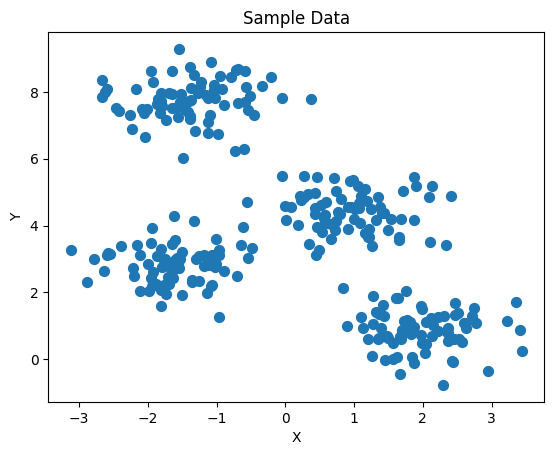

Simple KMeans:
Number of clusters: 2, Silhouette Score: 0.4546802473065816
Number of clusters: 3, Silhouette Score: 0.5890390393551768
Number of clusters: 4, Silhouette Score: 0.6819938690643478
Number of clusters: 5, Silhouette Score: 0.5832907052606381

DBSCAN:
EPS: 0.3, Min Samples: 5, Silhouette Score: -0.025530977724335973
EPS: 0.3, Min Samples: 10, Silhouette Score: -0.25081172884728203
EPS: 0.3, Min Samples: 15, No valid clusters found.
EPS: 0.3, Min Samples: 20, No valid clusters found.
EPS: 0.5, Min Samples: 5, Silhouette Score: 0.6303800996842714
EPS: 0.5, Min Samples: 10, Silhouette Score: 0.5220954071399261
EPS: 0.5, Min Samples: 15, Silhouette Score: 0.3871688267990456
EPS: 0.5, Min Samples: 20, Silhouette Score: 0.2097450211809529
EPS: 0.7, Min Samples: 5, Silhouette Score: 0.559707233404896
EPS: 0.7, Min Samples: 10, Silhouette Score: 0.6569398552813946
EPS: 0.7, Min Samples: 15, Silhouette Score: 0.6198214828463691
EPS: 0.7, Min Samples: 20, Silhouette Score: 0.60459371

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Generating sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualizing the sample data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sample Data')
plt.show()

# Simple KMeans Clustering
def kmeans_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    return labels

# DBSCAN Clustering
def dbscan_clustering(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    return labels

# Hierarchical Clustering
def hierarchical_clustering(X, n_clusters):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_clustering.fit_predict(X)
    return labels

# Evaluating clustering performance using silhouette score
def evaluate_clustering(X, labels):
    if len(np.unique(labels)) > 1:
        silhouette_avg = silhouette_score(X, labels)
        return silhouette_avg
    else:
        return -1  # Return a placeholder value when only noise points are present

# Testing Simple KMeans with different number of clusters
print("Simple KMeans:")
for n_clusters in range(2, 6):
    labels = kmeans_clustering(X, n_clusters)
    silhouette_avg = evaluate_clustering(X, labels)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

# Testing DBSCAN with different values of epsilon and min_samples
print("\nDBSCAN:")
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [5, 10, 15, 20]
for eps in eps_values:
    for min_samples in min_samples_values:
        labels = dbscan_clustering(X, eps, min_samples)
        silhouette_avg = evaluate_clustering(X, labels)
        if silhouette_avg != -1:
            print(f"EPS: {eps}, Min Samples: {min_samples}, Silhouette Score: {silhouette_avg}")
        else:
            print(f"EPS: {eps}, Min Samples: {min_samples}, No valid clusters found.")

# Testing Hierarchical Clustering with different number of clusters
print("\nHierarchical Clustering:")
for n_clusters in range(2, 6):
    labels = hierarchical_clustering(X, n_clusters)
    silhouette_avg = evaluate_clustering(X, labels)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")
